# Exploratory Analysis of Austin 3-1-1 Calls
---
<img src="imgs/exploratory_analysis.jpg" alt="Dashboard of Data Studio" width=600 height=600/>

In [1]:
# !mkdir -p clean_data
# !rm -rf clean_data/'complete_austin_311.csv'
# !wget 'https://austin-311-data.s3.us-east-2.amazonaws.com/complete_austin_311.csv' -P clean_data

In [2]:
%matplotlib inline 
import numpy as np # linear algebra lib
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy.stats as stats # Stats API 
import matplotlib.pyplot as plt # Plotting API
import seaborn as sns # Wrapper for Matplotlib 
import plotly.graph_objs as go # for interactive plotting
import plotly_express as px # Wrapper for plotly https://plot.ly/python/plotly-express/#visualize-distributions
import folium # https://python-visualization.github.io/folium/
import folium.plugins as plugins
from folium.plugins import HeatMap
import warnings # Necessary to ignore warnings
warnings.filterwarnings('ignore')
# Removes rows and columns truncation of '...'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
austin_311 = pd.read_csv('clean_data/complete_austin_311.csv', low_memory=False, parse_dates=['Incident Date'],infer_datetime_format=True)
austin_311.head()

Incident Type Code          Incident Description         Owning Department Method Received       Incident Date  Zip Code  Latitude Coordinate  Longitude Coordinate  Incident Year  Incident Month  Incident Hour Incident Weekday  Total population  Total household  Median household income
0           TRASIGMA  Traffic Signal - Maintenance            Transportation           Phone 2016-05-06 12:01:46     78703            30.296699            -97.768264           2016               5             12           Friday           20788.0           9723.0                  98553.0
1           TRASIGMA  Traffic Signal - Maintenance            Transportation           Phone 2016-05-06 19:51:27     78745            30.212695            -97.801521           2016               5             19           Friday           62220.0          25857.0                  60567.0
2           TRASIGMA  Traffic Signal - Maintenance            Transportation           Phone 2016-05-06 20:22:56     78745            30.212695            -97.801521           2016               5             20           Friday           62220.0          25857.0                  60567.0
3           SWSDEADA    ARR Dead Animal Collection  Austin Resource Recovery           Phone 2016-12-15 06:41:40     78741            30.230164            -97.731776           2016              12              6         Thursday           52307.0          20758.0                  39049.0
4           TRASIGMA  Traffic Signal - Maintenance            Transportation           Phone 2016-05-06 17:03:45     78759            30.384989            -97.766471           2016               5             17           Friday           41847.0          20240.0                  76749.0

In [4]:
austin_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714494 entries, 0 to 714493
Data columns (total 15 columns):
Incident Type Code         714494 non-null object
Incident Description       714494 non-null object
Owning Department          714494 non-null object
Method Received            714494 non-null object
Incident Date              714494 non-null datetime64[ns]
Zip Code                   714494 non-null int64
Latitude Coordinate        714494 non-null float64
Longitude Coordinate       714494 non-null float64
Incident Year              714494 non-null int64
Incident Month             714494 non-null int64
Incident Hour              714494 non-null int64
Incident Weekday           714494 non-null object
Total population           714494 non-null float64
Total household            714494 non-null float64
Median household income    714494 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 81.8+ MB


In [5]:
austin_311[austin_311['Incident Year'] == 2013].groupby(by=['Incident Year', 'Incident Month']).size()

Incident Year  Incident Month
2013           12                20
dtype: int64

**Since the year `2013` has only single month, we can drop that, and keep data from `2014-2019`.**

In [6]:
austin_311 = austin_311[austin_311['Incident Year'] != 2013]
austin_311['Incident Year'].unique()

array([2016, 2015, 2014, 2017, 2019, 2018])

Let's save it back to `csv` file:

## Let's dig in, starting with Top 10s


<img src="https://media.giphy.com/media/zoe6vq4UiWNJ6/giphy.gif" alt="Gif image" align="center"/>

> NOTE: Before we start let's make sure plots are colorblind friendly

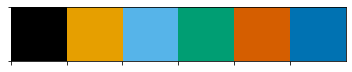

In [7]:
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]
sns.palplot(sns.color_palette(colors));

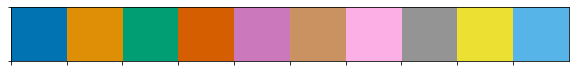

In [8]:
sns.palplot(sns.color_palette("colorblind"))

### Ten Most Commonly Occurring Complaints

In [9]:
complaint_counts = austin_311['Incident Description'].value_counts().sort_values(ascending=False)
top_10_complaints = complaint_counts[:10]
top_10_complaints

Austin Code - Request Code Officer     131423
Traffic Signal - Maintenance            47713
Loose Dog                               44642
ARR Missed Recycling                    32733
ARR Dead Animal Collection              30958
Animal Control - Assistance Request     30310
Street Light Issue- Address             28054
Injured / Sick Animal                   22354
Pothole Repair                          16455
Water Waste Report                      14753
Name: Incident Description, dtype: int64

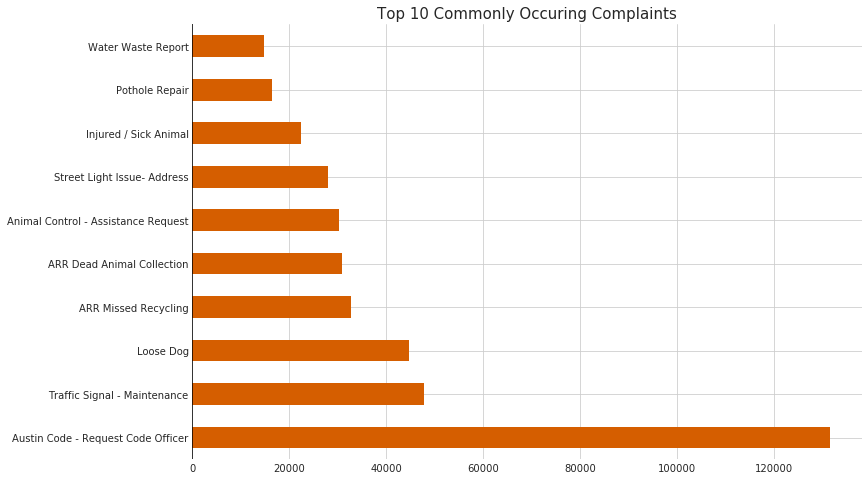

In [10]:
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Plot horizontal bar plot
ax = top_10_complaints.plot.barh(color=sns.color_palette("colorblind")[3])

# Add plot title
ax.set_title('Top 10 Commonly Occuring Complaints', fontsize=15)

# set inner Axes color
ax.set(facecolor='white')

# Empahsizes y-axis
ax.axvline(0, color="k")

# Remove all of the axis tick marks
ax.tick_params(bottom=True, top=False, left=False, right=False)

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('visualizations/top_10_austin_311_calls_complts.png')

## Top Ten Most Busy Departments

In [11]:
departments = austin_311['Owning Department'].value_counts().sort_values(ascending=False)
top_10_departments = departments[:10]
top_10_departments

Animal Services Office             142541
Austin Code Department             140489
Transportation                     131936
Austin Resource Recovery           101682
Public Works                        73982
Austin Energy Department            29605
Parks & Recreation Department       23707
Economic Development Department     16320
Watershed Protection                13983
Health & Human Services             13072
Name: Owning Department, dtype: int64

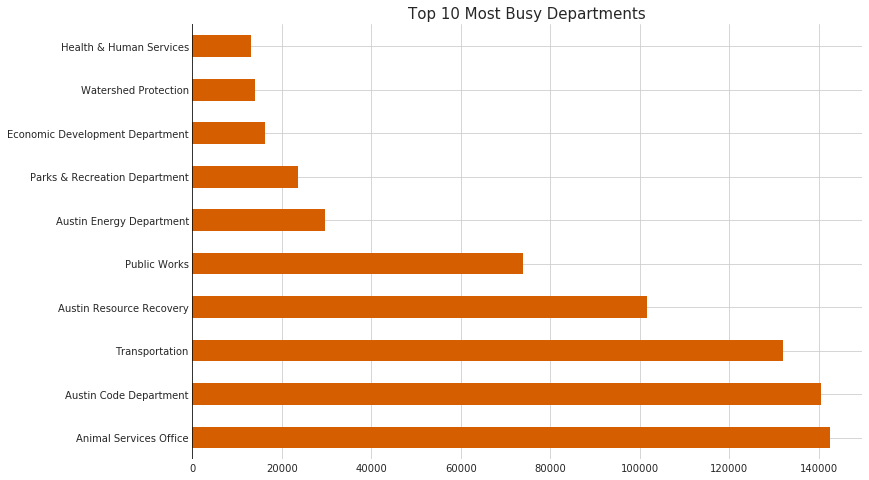

In [12]:
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# PLot horizontal bar plot
ax = top_10_departments.plot.barh(color=sns.color_palette("colorblind")[3])

# Add plot title
ax.set_title('Top 10 Most Busy Departments', fontsize=15)

# set inner Axes color
ax.set(facecolor='white')

# Empahsizes y-axis
ax.axvline(0, color="k")

# Remove all of the axis tick marks
ax.tick_params(bottom=True, top=False, left=False, right=False)

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('visualizations/top_10_austin_311_calls_depts.png')

## Top Ten Most Common Source of 311 calls

In [13]:
common_source = austin_311['Method Received'].value_counts().sort_values(ascending=False)
top_10_common_source = common_source[:10]

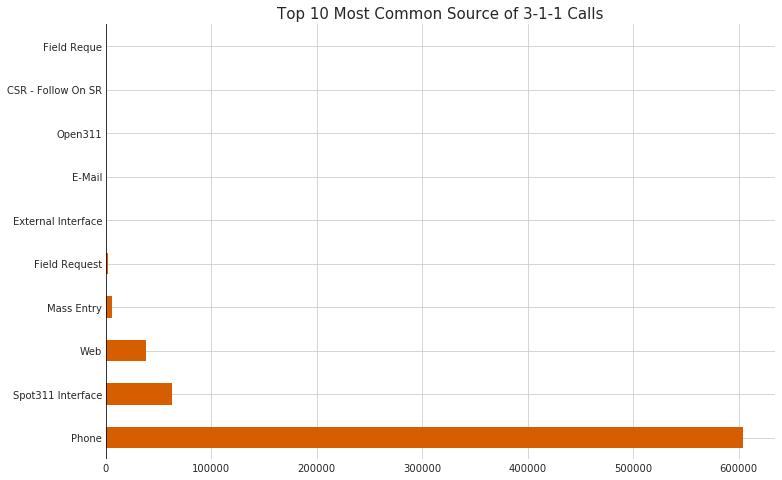

In [14]:
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# PLot horizontal bar plot
ax = top_10_common_source.plot.barh(color=sns.color_palette("colorblind")[3])

# Add plot title
ax.set_title('Top 10 Most Common Source of 3-1-1 Calls', fontsize=15) 

# Set inner Axes color
ax.set(facecolor='white')

# Empahsizes y-axis
ax.axvline(0, color="k")

# Remove all of the axis tick marks
ax.tick_params(bottom=True, top=False, left=False, right=False)

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('visualizations/top_10_austin_311_calls_source.png')    

# Time series analysis

In [15]:
# Subset data frame to appropriate datetime info. columns
dt_austin311 = austin_311[['Incident Type Code', 'Incident Year', 'Incident Month', 'Incident Hour', 'Incident Weekday']].rename(columns={"Incident Type Code": "Number of Complaints"})
dt_austin311.head()

Number of Complaints  Incident Year  Incident Month  Incident Hour Incident Weekday
0             TRASIGMA           2016               5             12           Friday
1             TRASIGMA           2016               5             19           Friday
2             TRASIGMA           2016               5             20           Friday
3             SWSDEADA           2016              12              6         Thursday
4             TRASIGMA           2016               5             17           Friday

In [16]:
# Make Pivot table of complaint counts
pivot_austin311 = dt_austin311.pivot_table(values='Number of Complaints', index=['Incident Year', 'Incident Month'], aggfunc='count')
pivot_austin311

Number of Complaints
Incident Year Incident Month                      
2014          1                               8328
              2                               7652
              3                               9498
              4                              10965
              5                              10391
              6                              12182
              7                              11895
              8                              11926
              9                              12020
              10                             11298
              11                              8667
              12                              8635
2015          1                               8636
              2                               7898
              3                              10192
              4                              11298
              5                              13780
              6                              14865
              7                              13425
              8                              12144
              9                              11043
              10                             11832
              11                              9505
              12                              8210
2016          1                               8594
              2                               8494
              3                              10077
              4                              11166
              5                              12376
              6                              12626
              7                               9522
              8                              11640
              9                              12231
              10                             10311
              11                              8859
              12                              8158
2017          1                               4466
              2                               2054
              3                               8763
              4                               7435
              5                              10889
              6                              11121
              7                              10468
              8                              11828
              9                              10303
              10                              9555
              11                              5736
              12                              7694
2018          1                               8737
              2                               8299
              3                               9976
              4                              10943
              5                              12693
              6                              11844
              7                              12036
              8                              12655
              9                              13203
              10                             14774
              11                             10730
              12                              8304
2019          1                              11764
              2                              11353
              3                              13273
              4                              15748
              5                              17921
              6                              16004
              7                              13566

## By Year

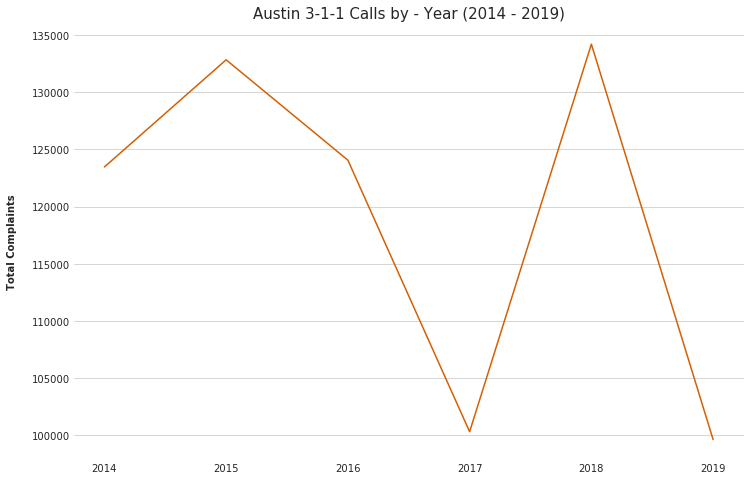

In [17]:
counts_by_year = dt_austin311['Incident Year'].value_counts().sort_index()

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Create line plot
ax = counts_by_year.plot(color=sns.color_palette("colorblind")[3], linewidth=1.5)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by - Year (2014 - 2019)', fontsize=15)

# Add title to x and y axis
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Turn off y axis grid
ax.grid(axis='x')

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('visualizations/austin_311_calls_by_year.png')

This is interesting, total complaints dropped in `2017` after it peaked in `2015`, than sudden rise in complaints in `2018`, while `2019` still isn't quite close to `2018` yet.

A divering plot would also help here, let's plot it, 

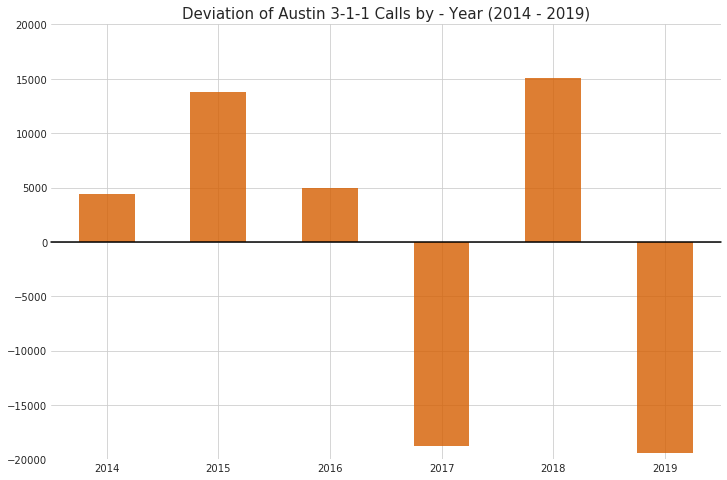

In [18]:
diff = counts_by_year - counts_by_year.mean()

plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# PLot horizontal bar plot
ax = diff.plot(kind='bar', color=sns.color_palette("colorblind")[3], alpha=0.8)

# Add plot title
ax.set_title('Deviation of Austin 3-1-1 Calls by - Year (2014 - 2019)', fontsize=15) 

# Set inner Axes color
ax.set(facecolor='white')

# Fix y-axis limits
ax.set_ylim([-20000, 20000])

# Remove all of the axis tick marks
ax.tick_params(bottom=True, top=False, left=False, right=False)

# Set vertical and horizontal lines
ax.axhline(0, color="k", clip_on=False)

# Rotate x-ticklabels
xlabels = ax.get_xticklabels()
ax.set_xticklabels(labels=xlabels, rotation=0)

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
    
plt.savefig('visualizations/austin_311_calls_by_year_devtn.png')

Indeed, `2017` has been the lowest year with fewest call, while `2019` can be considered inconclusive as we don't have enough data yet. We can explore this further later on by looking at the plot by year and month.

![](https://i.imgur.com/Ey8Ky4z.gif)

## By Month

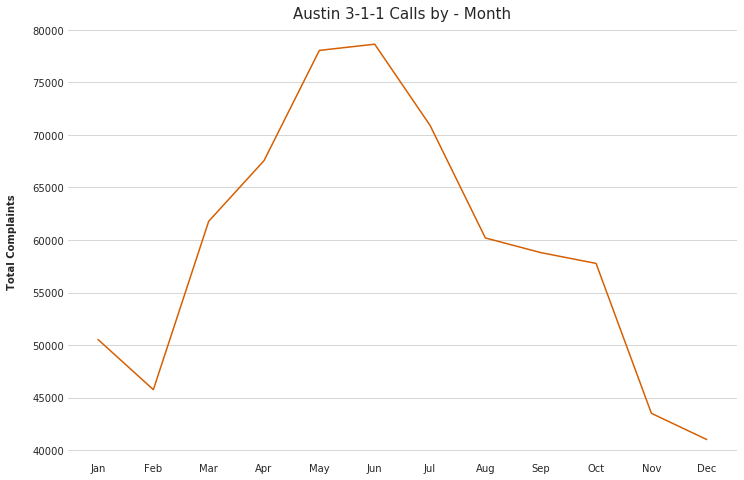

In [19]:
counts_by_month = dt_austin311['Incident Month'].value_counts().sort_index()

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Create line plot
ax = counts_by_month.plot(color=sns.color_palette("colorblind")[3], linewidth=1.5)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by - Month', fontsize=15)

# Add title to x and y axis
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Correct x-ticks
ax.set_xticks(range(1, 13))
ax.set_xticklabels(labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Turn off y axis grid
ax.grid(axis='x')

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('visualizations/austin_311_calls_by_month.png')

It looks like Late Spring and Early Summer have the most 311 calls by far, compare to Winter months.

## By Year and Month

#### Answers: How 311 calls differed over the years ?

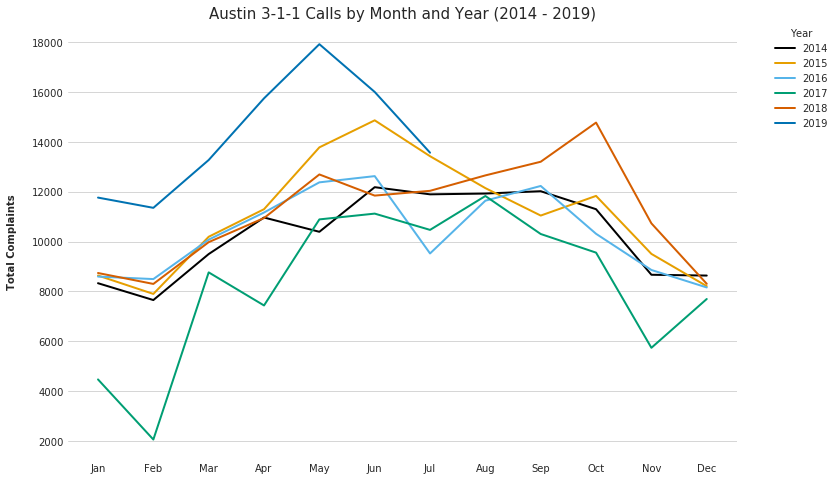

In [20]:
# Get pivot table
complnts_by_year_and_month = dt_austin311.pivot_table(values='Number of Complaints', index='Incident Month', columns='Incident Year', aggfunc='count')

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Get current axis
ax = plt.gca()

# Create line plot
ax = complnts_by_year_and_month.plot(kind='line', ax=ax, linewidth=2, color=colors)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by Month and Year (2014 - 2019)', fontsize=15)

# Add y axis label and turn of x axis label
ax.xaxis.label.set_visible(False)
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Set x-ticks and labels
ax.set_xticks(range(1, 13))
ax.set_xticklabels(labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid(axis='x')

# Set legend
ax.legend(bbox_to_anchor=(1.05, 1), loc= 2, borderaxespad = 0., title="Year")

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('visualizations/austin_311_calls_by_year_month.png')

There are couple of things to note here, 311 Calls for Austin following loose trend, with peak in Late Spring and Early Summer regardless of the Year calls were made. Another thing to note is 2019 started off with most calls, and this could be attributed to multitude of factors, like awarness of 3-1-1, or sudden increase in population. 

## By Hour

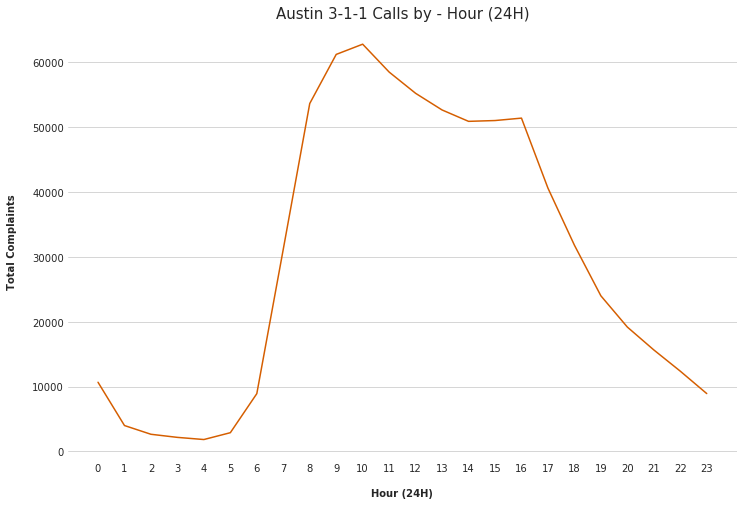

In [21]:
counts_by_hour = dt_austin311['Incident Hour'].value_counts().sort_index()

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Create line plot
ax = counts_by_hour.plot(color=sns.color_palette("colorblind")[3], linewidth=1.5)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by - Hour (24H)', fontsize=15)

# Add title to x and y axis
ax.set_xlabel('Hour (24H)', fontweight='bold', labelpad=15)
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Correct x-ticks
ax.set_xticks(range(0, 24))

ax.grid(axis='x')

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('visualizations/austin_311_calls_by_hour.png')

It looks like the busiest time is between 8-10 AM in morning, and 4 in the afternoon. 

## By Weekday

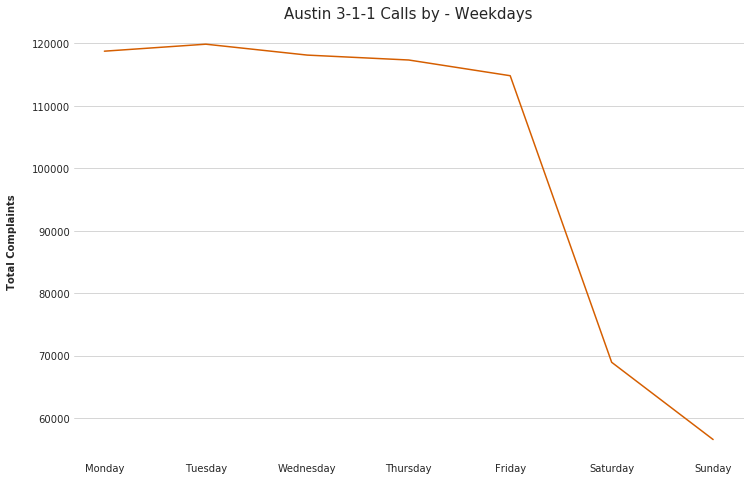

In [22]:
counts_by_wkdy = dt_austin311['Incident Weekday'].value_counts()
counts_by_wkday_vals = np.array([counts_by_wkdy['Monday'], counts_by_wkdy['Tuesday'], counts_by_wkdy['Wednesday'], counts_by_wkdy['Thursday'], counts_by_wkdy['Friday'], counts_by_wkdy['Saturday'], counts_by_wkdy['Sunday']])

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Create line plot
ax.plot(counts_by_wkday_vals, color=sns.color_palette("colorblind")[3], linewidth=1.5)

# Add plot title
ax.set_title('Austin 3-1-1 Calls by - Weekdays', fontsize=15)

# Add title to x and y axis
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)

# Correct x-ticks
ax.set_xticks(range(0, 7))
ax.set_xticklabels(labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.grid(axis='x')

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('visualizations/austin_311_calls_by_weekdays.png')

Looks like Weekdays were when the most complaints were reported, compared to Weekends. Another thing to note is, withing Weekdays, Monday and Tuesday were most complaints/service requests were made.

### By Hour and Weekday

#### Answers: When is the busiest time for 3-1-1 Calls and on which weekdays it is the most busiest ?

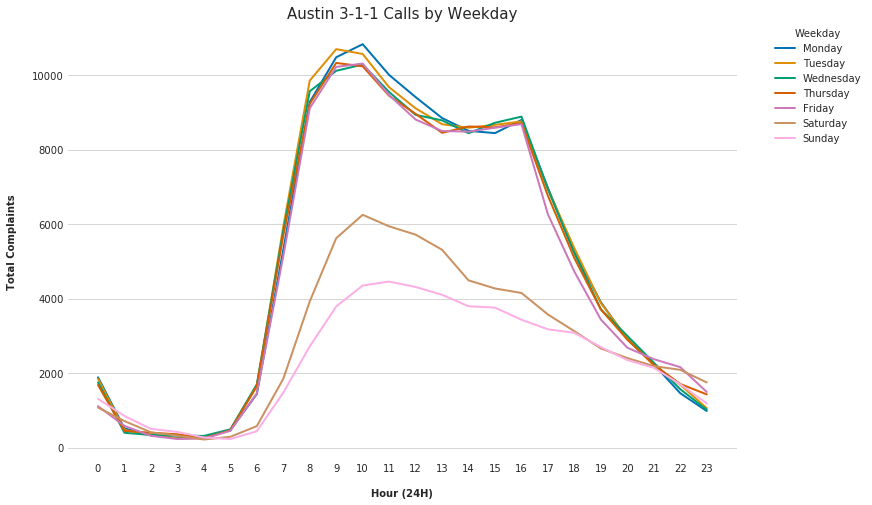

In [23]:
# Get pivot table of complaint counts by hour and weekday
counts_by_hour_wkdy = dt_austin311.pivot_table(values='Number of Complaints', index='Incident Hour', columns='Incident Weekday', aggfunc='count')

# Re-orient columns to proper weekday order so it's easy to see
counts_by_hour_wkdy = counts_by_hour_wkdy[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Get current axis
ax = plt.gca()

# Create line plot
ax = counts_by_hour_wkdy.plot(kind='line', ax=ax, linewidth=2, color=sns.color_palette("colorblind"))

# Add plot title
ax.set_title('Austin 3-1-1 Calls by Weekday', fontsize=15)

# Add y axis label and turn of x axis label
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)
ax.set_xlabel('Hour (24H)', fontweight='bold', labelpad=15)

# Set x-ticks and labels
ax.set_xticks(range(0, 24))
ax.grid(axis='x')

# Set legend
ax.legend(bbox_to_anchor=(1.05, 1), loc= 2, borderaxespad = 0., title="Weekday")

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.savefig('visualizations/austin_311_calls_by_hour_weekdays.png')

As we noticed earlier, no significant trend besides early morning service requests and around afternoon time (about 4 PM). Let's now make a pivot table to compare the Top 10 complaints and busy departments vs. Year, to see if calls for them decreased or increased, or stayed the same.

### Has city response decreased the number of top complaint calls ?

In [24]:
comps_ovr_yrs = austin_311.loc[austin_311['Incident Description'].isin(top_10_complaints.index.tolist()), ['Incident Type Code', 'Incident Description', 'Incident Year']]
top_comps_ovr_yrs = comps_ovr_yrs.pivot_table(values='Incident Type Code', index='Incident Description', columns='Incident Year', aggfunc='count')
top_comps_ovr_yrs

Incident Year                         2014   2015   2016   2017   2018   2019
Incident Description                                                         
ARR Dead Animal Collection            5342   6108   5417   4875   5503   3713
ARR Missed Recycling                  5419   5937   6564   4551   6394   3868
Animal Control - Assistance Request   5974   5905   5332   3938   5202   3959
Austin Code - Request Code Officer   19603  22363  22641  18432  29057  19327
Injured / Sick Animal                 3962   4179   4168   3088   3622   3335
Loose Dog                             9429   8813   8230   5658   7621   4891
Pothole Repair                        1384   3625   2850   2423   3172   3001
Street Light Issue- Address           4383   5090   5545   4446   5199   3391
Traffic Signal - Maintenance          8638   7672   7278   6314   9624   8187
Water Waste Report                    4490   4032   2102   1056   2348    725

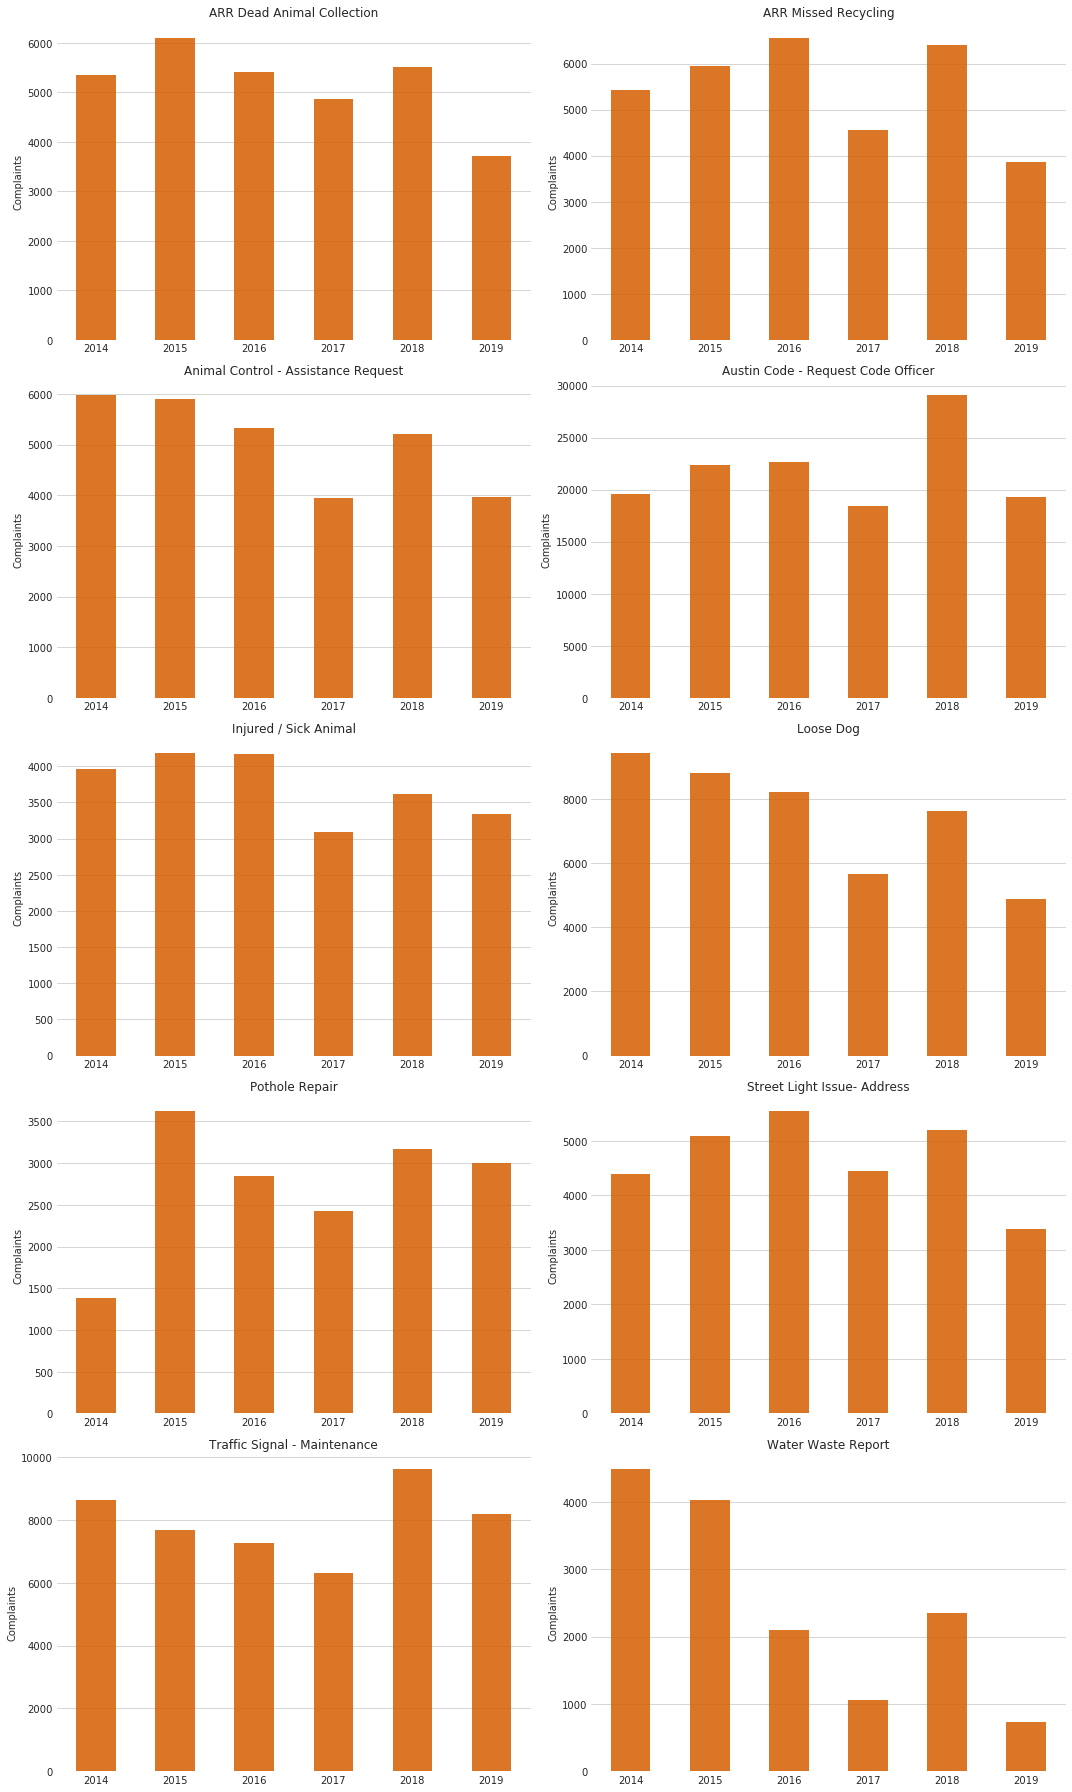

In [25]:
fig = plt.figure(figsize=(15, 25))
for idx in range(top_comps_ovr_yrs.shape[0]):
    ax = fig.add_subplot(5, 2, idx+1)
    ax = top_comps_ovr_yrs.iloc[idx].plot(kind='bar', title=top_comps_ovr_yrs.iloc[idx].name, ax=ax, color=sns.color_palette("colorblind")[3], alpha=0.85)
    ax.set_ylabel('Complaints')
    ax.xaxis.label.set_visible(False)
    ax.grid(axis='x')
    # Hide all of the spines
    for spine in ax.spines.values():
        spine.set_visible(False)
    # Rotate x-ticklabels
    xlabels = ax.get_xticklabels()
    ax.set_xticklabels(labels=xlabels, rotation=0)
        
plt.tight_layout()
plt.savefig('visualizations/top10_complts_ovr_yrs.png')

In [26]:
deps_ovr_yrs = austin_311.loc[austin_311['Owning Department'].isin(top_10_departments.index.tolist()), ['Incident Type Code', 'Owning Department', 'Incident Year']]
top_deps_ovr_yrs = deps_ovr_yrs.pivot_table(values='Incident Type Code', index='Owning Department', columns='Incident Year', aggfunc='count')
top_deps_ovr_yrs

Incident Year                       2014     2015     2016     2017     2018     2019
Owning Department                                                                    
Animal Services Office           26829.0  27123.0  26410.0  19409.0  24756.0  18014.0
Austin Code Department           18952.0  24031.0  24442.0  19963.0  31680.0  21421.0
Austin Energy Department          4665.0   5361.0   5875.0   4659.0   5471.0   3574.0
Austin Resource Recovery         17071.0  19354.0  18245.0  14863.0  19269.0  12880.0
Economic Development Department   6634.0   2888.0   1814.0   1595.0   1710.0   1679.0
Health & Human Services           5274.0   5045.0   2753.0      NaN      NaN      NaN
Parks & Recreation Department     6753.0   3917.0   3960.0   2762.0   3712.0   2603.0
Public Works                      8164.0  14788.0  14436.0  12054.0  13708.0  10832.0
Transportation                   22195.0  22710.0  20179.0  17528.0  25772.0  23552.0
Watershed Protection              2179.0   3429.0   2613.0   1957.0   2038.0   1767.0

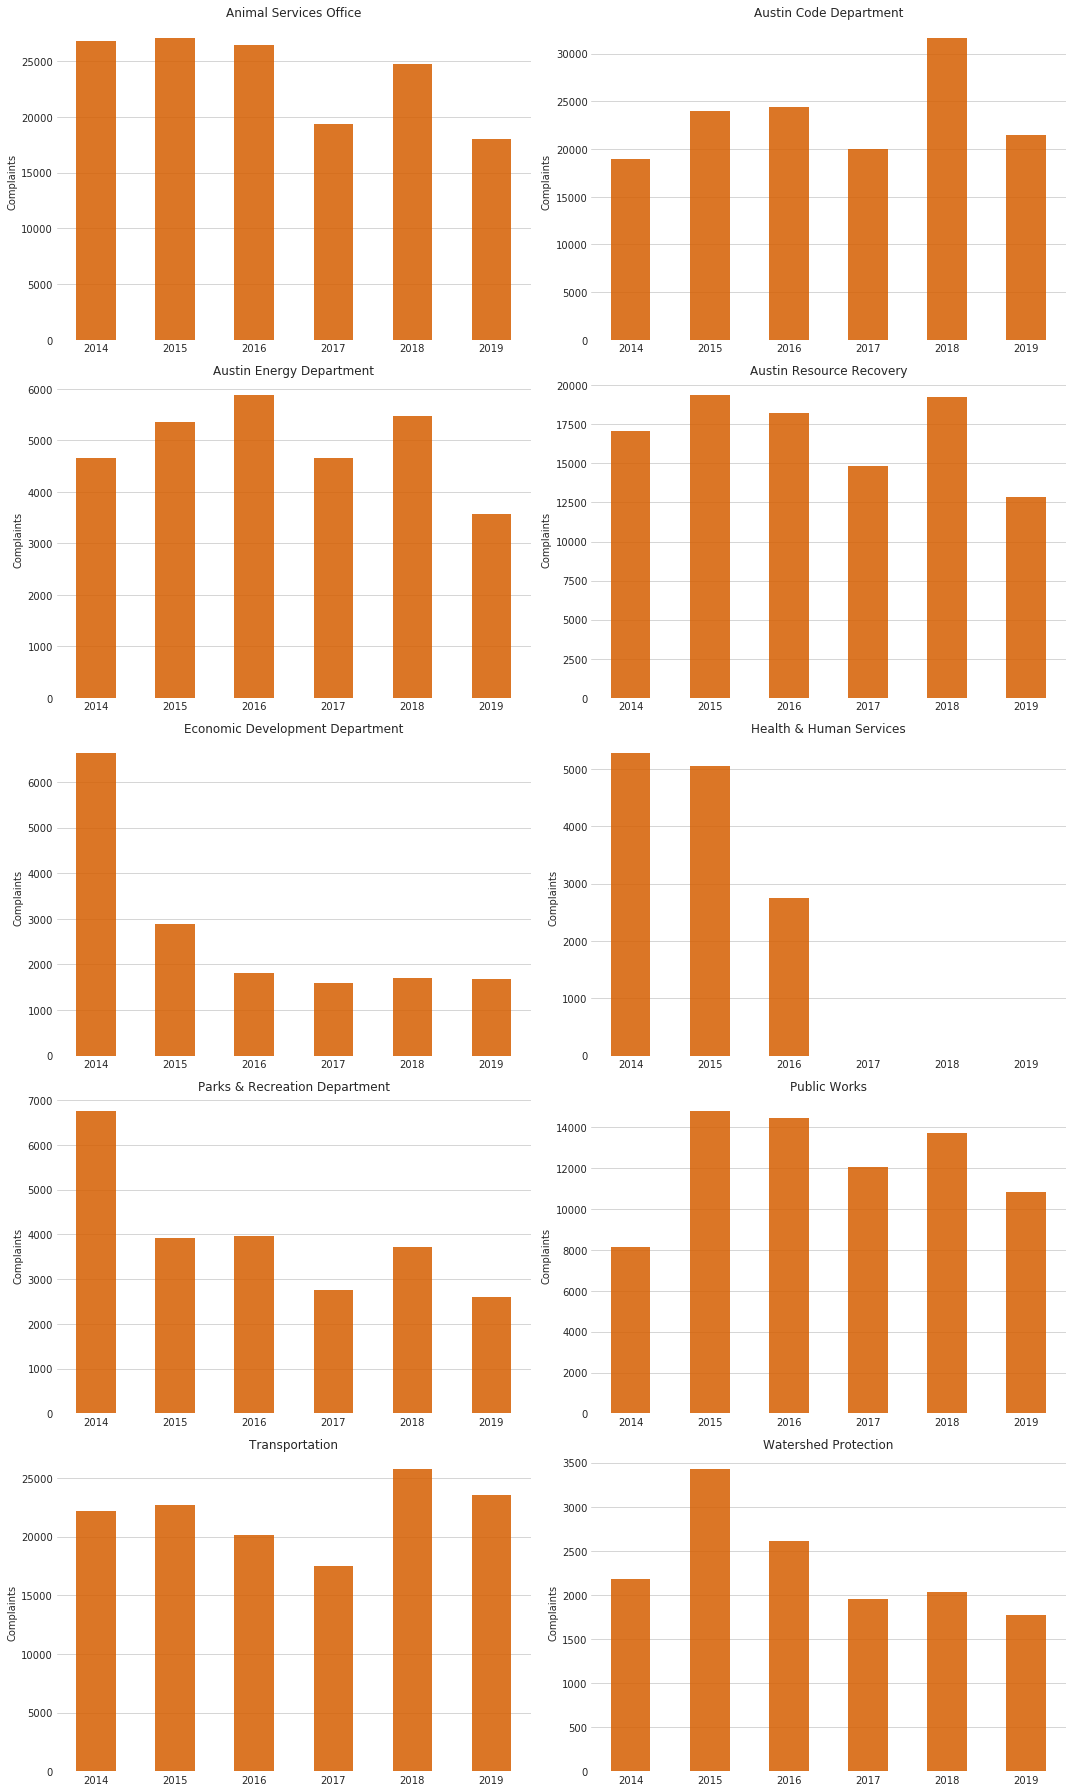

In [27]:
fig = plt.figure(figsize=(15, 25))
for idx in range(top_deps_ovr_yrs.shape[0]):
    ax = fig.add_subplot(5, 2, idx+1)
    ax = top_deps_ovr_yrs.iloc[idx].plot(kind='bar', title=top_deps_ovr_yrs.iloc[idx].name, ax=ax, color=sns.color_palette("colorblind")[3], alpha=0.85)
    ax.set_ylabel('Complaints')
    ax.xaxis.label.set_visible(False)
    ax.grid(axis='x')
    # Rotate x-ticklabels
    xlabels = ax.get_xticklabels()
    ax.set_xticklabels(labels=xlabels, rotation=0)
    # Hide all of the spines
    for spine in ax.spines.values():
        spine.set_visible(False)
        
plt.tight_layout()
plt.savefig('visualizations/top10_complts_depts_ovr_yrs.png')
plt.show()

In [28]:
for yr in sorted(austin_311['Incident Year'].unique()):
    print(' ----------------------- Year {} --------------------- '.format(yr))
    counts = austin_311.loc[austin_311['Incident Year'] == yr, 'Incident Description'].value_counts().sort_values(ascending=False)[:10]
    print(counts)
    print('------------------------------------------------------')

 ----------------------- Year 2014 --------------------- 
Austin Code - Request Code Officer     19603
Loose Dog                               9429
Traffic Signal - Maintenance            8638
Loud Music                              6634
Animal Control - Assistance Request     5974
ARR Missed Recycling                    5419
ARR Dead Animal Collection              5342
Graffiti Abatement                      5266
Water Waste Report                      4490
Street Light Issue- Address             4383
Name: Incident Description, dtype: int64
------------------------------------------------------
 ----------------------- Year 2015 --------------------- 
Austin Code - Request Code Officer     22363
Loose Dog                               8813
Traffic Signal - Maintenance            7672
ARR Dead Animal Collection              6108
ARR Missed Recycling                    5937
Animal Control - Assistance Request     5905
Street Light Issue- Address             5090
Graffiti Abatement     

## Subset by Interesting Complaints

In [29]:
def get_incident_subset(df, time_col, filter_col, match):
    cols = ['Latitude Coordinate', 'Longitude Coordinate']
    cols.append(time_col)
    return df.loc[df[filter_col].str.contains(match, case=False), cols].copy().reset_index(drop=True)

In [30]:
loud_music_complaints = get_incident_subset(austin_311, 'Incident Date', 'Incident Description', 'music')
!rm -rf 'clean_data/loud_music_hmap.csv'
loud_music_complaints.to_csv('clean_data/loud_music_hmap.csv', index=False)

In [31]:
dockless_issues = get_incident_subset(austin_311, 'Incident Date', 'Incident Description', 'dockless')
!rm -rf 'clean_data/dockless_hmap.csv'
dockless_issues.to_csv('clean_data/dockless_hmap.csv', index=False)

### Loud Noise Complaints

![](https://media.giphy.com/media/l2JefZrpEXqlvNjsA/giphy.gif)

In [32]:
recent_complaints = austin_311.loc[(austin_311['Incident Year'] == 2019), ['Incident Date', 'Latitude Coordinate', 'Longitude Coordinate']].copy().reset_index(drop=True)
!rm -rf 'clean_data/recent_loudmusic_hmap.csv'
recent_complaints.to_csv('clean_data/recent_loudmusic_hmap.csv', index=False)

austin_city_coords = [30.267768, -97.744388]
lat_long = recent_complaints[['Latitude Coordinate', 'Longitude Coordinate']].values

def make_folium_heatmap(city_coords, lat_long, blur=25, opacity=0.3,time_indx=None):
    mh = folium.Map(location=city_coords, 
                    zoom_start = 10.5)
    if not time_indx:
        plugins.HeatMap(lat_long, max_opacity=opacity).add_to(mh)
        return mh   
    plugins.HeatMapWithTime(
    data=lat_long,
    index = time_indx,
    auto_play=True,
    max_opacity=opacity).add_to(mh)
    return mh

make_folium_heatmap(austin_city_coords, lat_long)

Even though we narrowed it down to this year's loud music complaint calls it's much harder to visualize given the amount of 311 calls, so let's try animate it over the years from 2014 to recent 2019 and see what it can tell.


![](https://i.imgur.com/KSt4M2u.gif)

### Love it or hate it here, you gotta admit they are at least fun to ride Weeeeee! Scotters 

![](https://media.giphy.com/media/kBkHpyBA3zwZLCJMc8/giphy.gif)

Austin isn't the only city that is facing this mess, currently all metropolitan cities are facing this issue, with `Dockless Bike/Scotter` sharing the new vogue, it has literally exploded this recent past few years, with cities dealing with mess in cities like Dallas:

![](imgs/dallas_lime_scotters_knocked.png)

And signs prohibiting scooters on UT Austin's side walks, on Capitol Grounds, and city encouraging the reports of dockless rental scotters being used on trails where it's not allowed.

![](imgs/no_electric_scotters_austin.jpg)


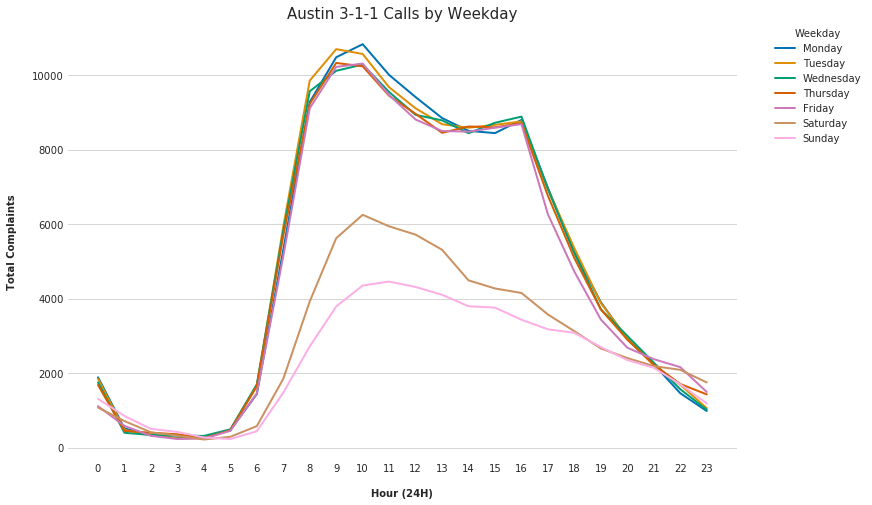

In [33]:
# Get pivot table of complaint counts by hour and weekday
counts_by_hour_wkdy = dt_austin311.pivot_table(values='Number of Complaints', index='Incident Hour', columns='Incident Weekday', aggfunc='count')

# Re-orient columns to proper weekday order so it's easy to see
counts_by_hour_wkdy = counts_by_hour_wkdy[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

# Get current axis
ax = plt.gca()

# Create line plot
ax = counts_by_hour_wkdy.plot(kind='line', ax=ax, linewidth=2, color=sns.color_palette("colorblind"))

# Add plot title
ax.set_title('Austin 3-1-1 Calls by Weekday', fontsize=15)

# Add y axis label and turn of x axis label
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)
ax.set_xlabel('Hour (24H)', fontweight='bold', labelpad=15)

# Set x-ticks and labels
ax.set_xticks(range(0, 24))
ax.grid(axis='x')

# Set legend
ax.legend(bbox_to_anchor=(1.05, 1), loc= 2, borderaxespad = 0., title="Weekday")

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)

plt.savefig('visualizations/austin_311_calls_by_hour_weekdays.png')

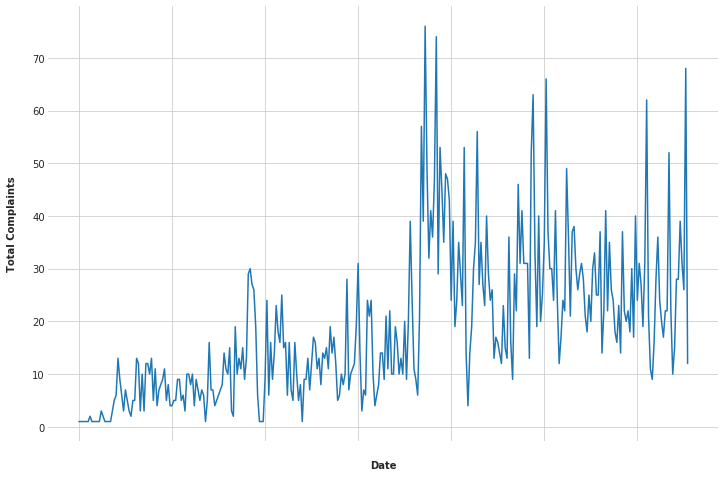

In [34]:
# Set style
plt.style.use('seaborn-whitegrid')

# Create figure
fig = plt.figure(figsize=(12, 8))

ax = plt.gca()

# Create line plot
ax = dockless_issues['Incident Date'].dt.strftime('%Y-%m-%d').value_counts().sort_index().plot(kind='line', ax=ax)

# Add y axis label and turn of x axis label
ax.set_ylabel('Total Complaints', fontweight='bold', labelpad=15)
ax.set_xlabel('Date', fontweight='bold', labelpad=15)

# Hide all of the spines
for spine in ax.spines.values():
    spine.set_visible(False)

![](https://i.imgur.com/R4NljtQ.png)

![](https://i.imgur.com/VdAI2cd.gif)

In [37]:
austin_311.groupby(['Owning Department', 'Incident Description']).size()

Owning Department                             Incident Description                               
Animal Services Office                        Animal - Proper Care                                     8433
                                              Animal Bite                                              7077
                                              Animal Control - Assistance Request                     30310
                                              Animal In Vehicle                                        1710
                                              Animal Roadside Sales                                     134
                                              Animal Trapped in Storm Drain                             594
                                              Bat Complaint                                            1030
                                              Coyote Complaints                                        1888
                                      